## First Look to Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
planets = sns.load_dataset('planets')
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [5]:
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [6]:
df.tail(3)

,method,number,orbital_period,mass,distance,year
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [7]:
df.shape

(1035, 6)

In [8]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
df[['orbital_period','mass','distance']].fillna(0, inplace=True)

/Users/berkayevirgen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [12]:
df['orbital_period'].fillna(np.mean(df.mass), inplace=True)
# It's just simple method for NaN values, if you dont want spend much time, you can do it but It's not totally true method, you should detailed analyse

In [13]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

## Categorical Variable Summary

In [14]:
cat_df = df.select_dtypes(include = ['category'])
cat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [15]:
cat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

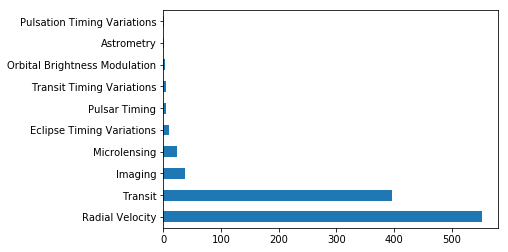

In [16]:
df['method'].value_counts().plot.barh()
plt.show()

In [17]:
from pandas.api.types import CategoricalDtype

In [18]:
cat_df = cat_df.astype(CategoricalDtype(ordered = True))
cat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

## Constant Variable Summary

In [19]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [21]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.000000,1.000,2.00,7.0
orbital_period,1035.0,1919.814199,25471.190046,0.090706,4.461268,31.884,487.10,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.229000,1.260,3.04,25.0
distance,808.0,264.069282,733.116493,1.350000,32.560000,55.250,178.50,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.000000,2010.000,2012.00,2014.0


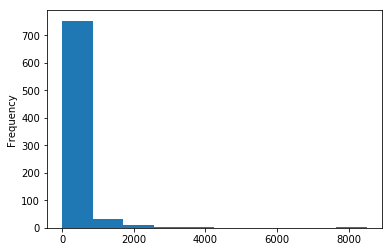

In [22]:
df['distance'].plot.hist(bins = 10)
plt.show()

## Distribution / Barplot

In [23]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df.shape

(53940, 10)

In [25]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [27]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [28]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [29]:
df.cut.head(1) # there's wrong categorical alignment

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [30]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]

In [31]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]

In [32]:
cut_categories = ['Fair','Good','Very Good', 'Premium', 'Ideal']

In [33]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_categories, ordered = True))

In [34]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

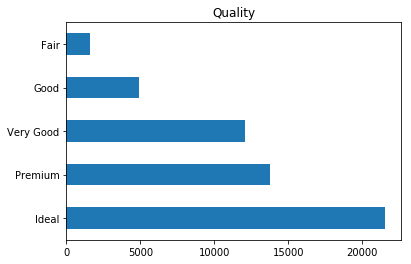

In [35]:
df['cut'].value_counts().plot.barh().set_title('Quality');

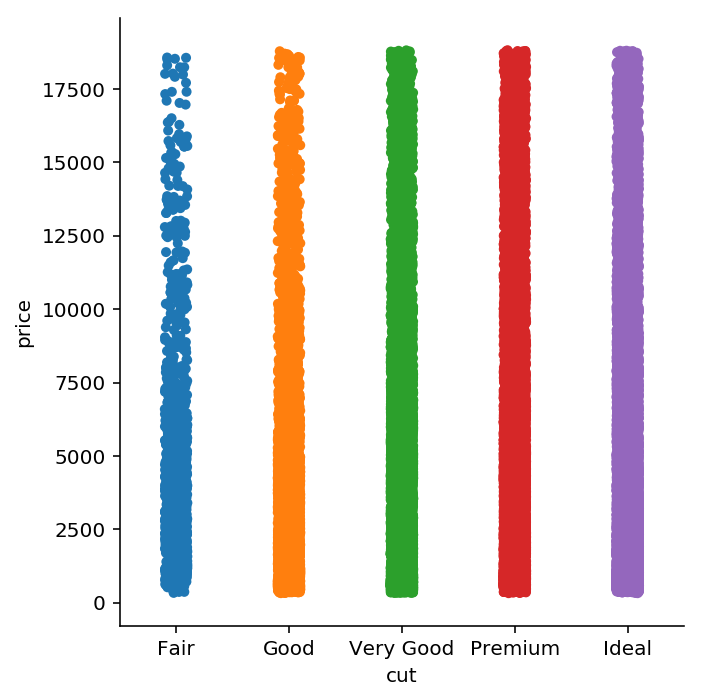

In [36]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x='cut', y='price', data = df);

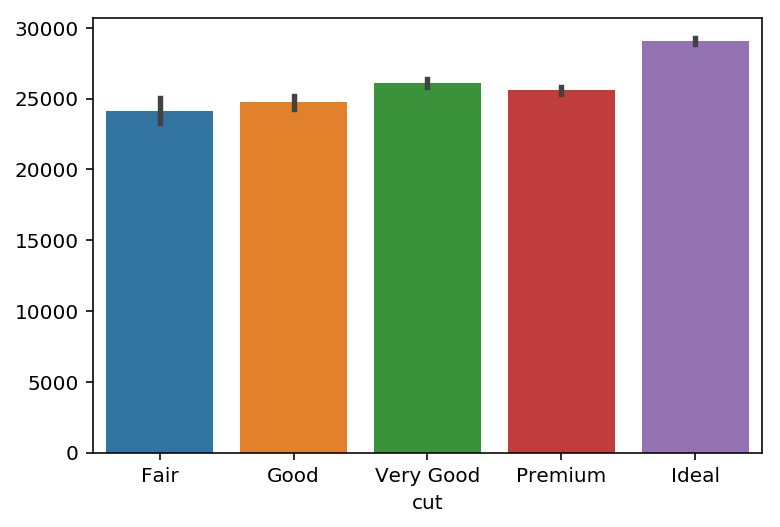

In [37]:
sns.barplot(df.cut, df.cut.index)

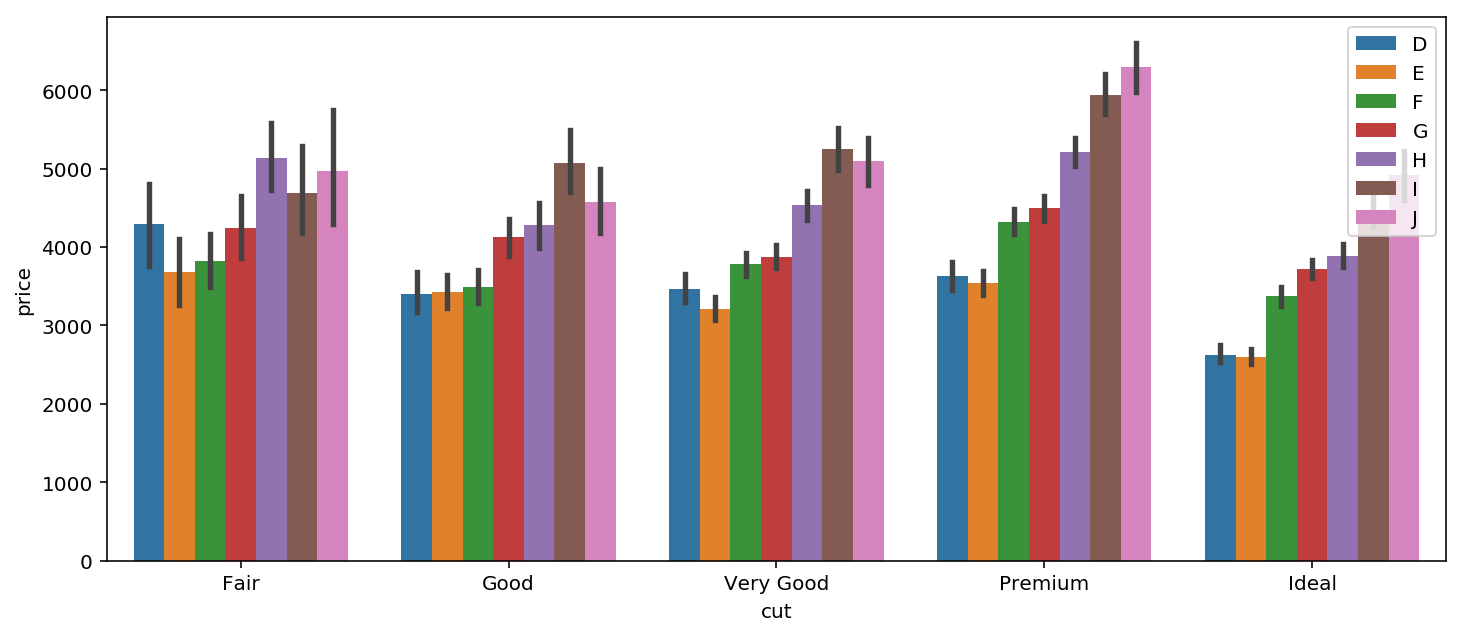

In [38]:
f, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df)
ax.legend(loc='upper right', frameon = True) 
plt.show()

In [39]:
df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [40]:
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


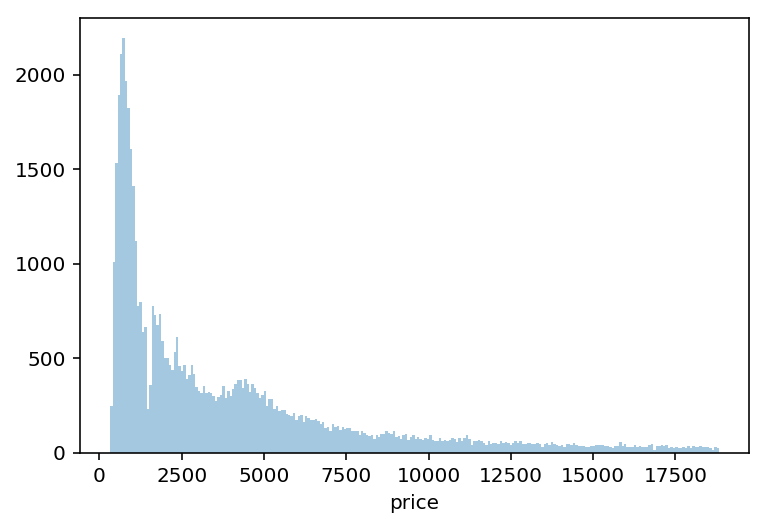

In [41]:
sns.distplot(df.price, bins=250, kde=False);

In [42]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

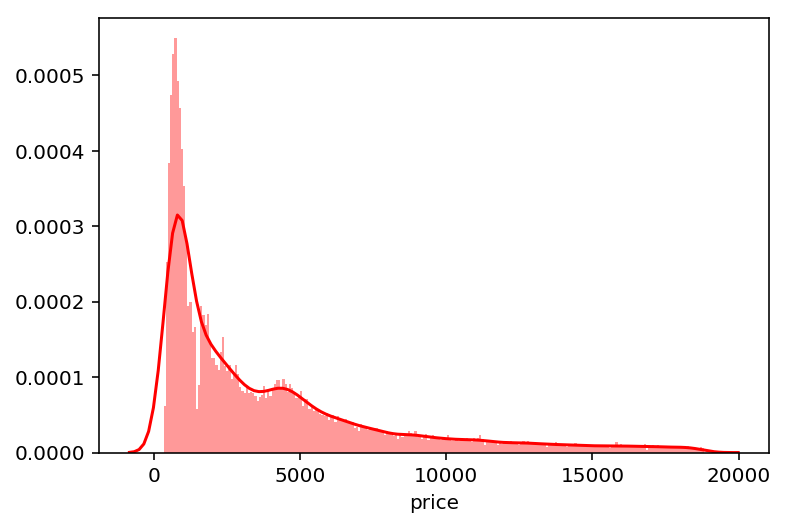

In [43]:
sns.distplot(df.price, bins=250, kde=True, color='red', hist=True);

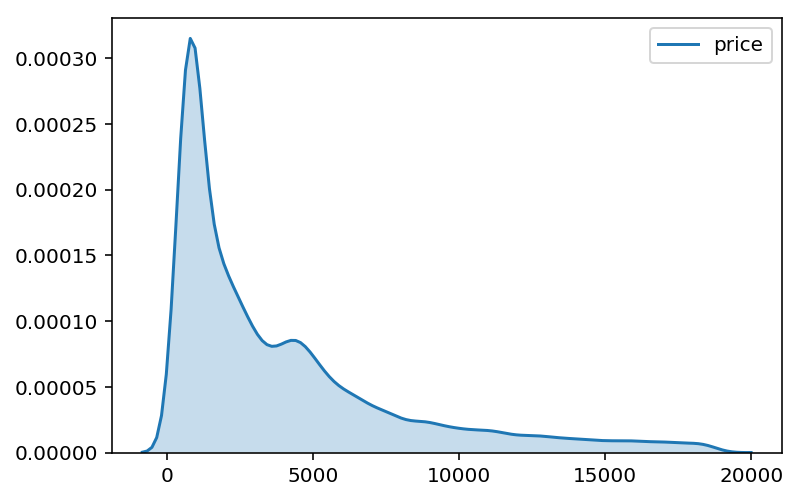

In [44]:
sns.kdeplot(df.price, shade=True);

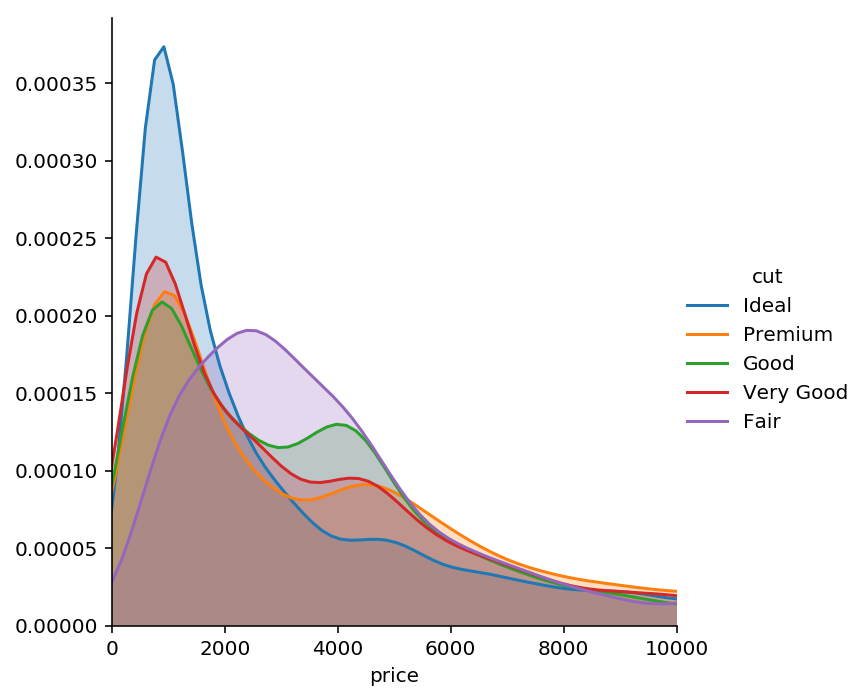

In [45]:
(sns
 .FacetGrid(df,
               hue= 'cut',
               height= 5,
               xlim=(0, 10000))
 .map(sns.kdeplot, 'price', shade=True)
 .add_legend()
);

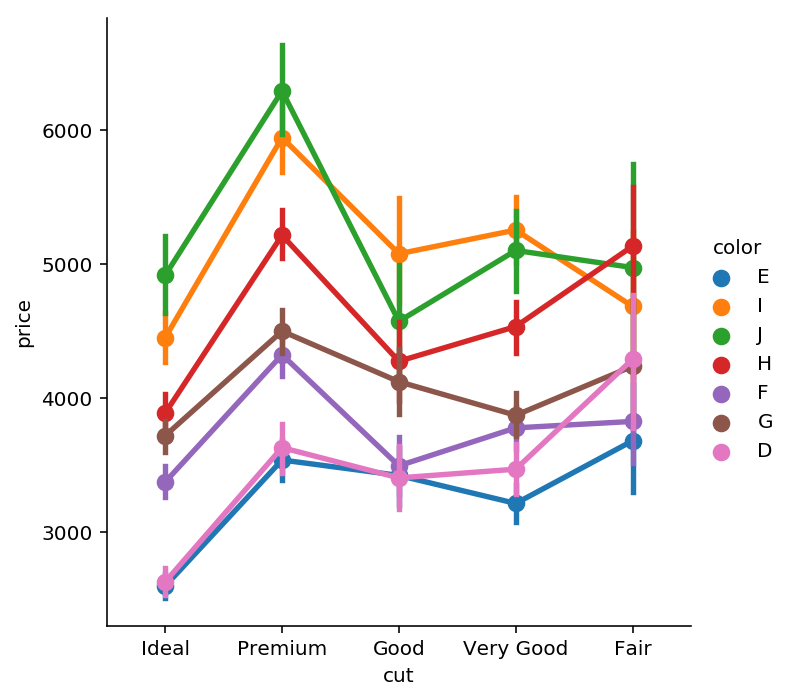

In [46]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df);

In [47]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [49]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [50]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [51]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [52]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

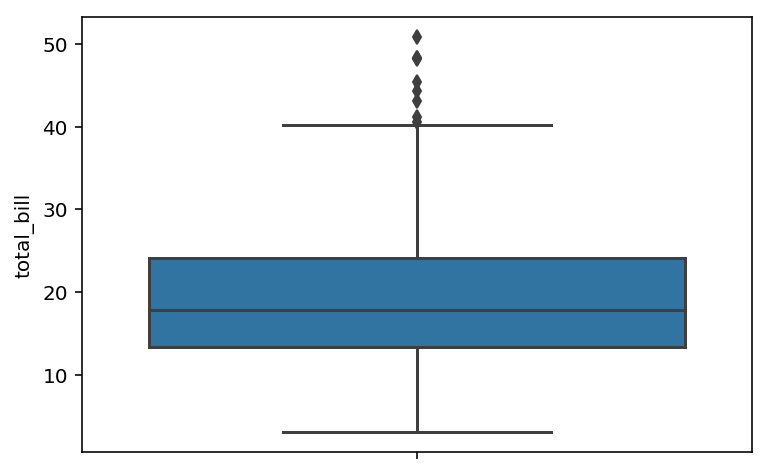

In [53]:
sns.boxplot(df['total_bill'], orient = 'v');

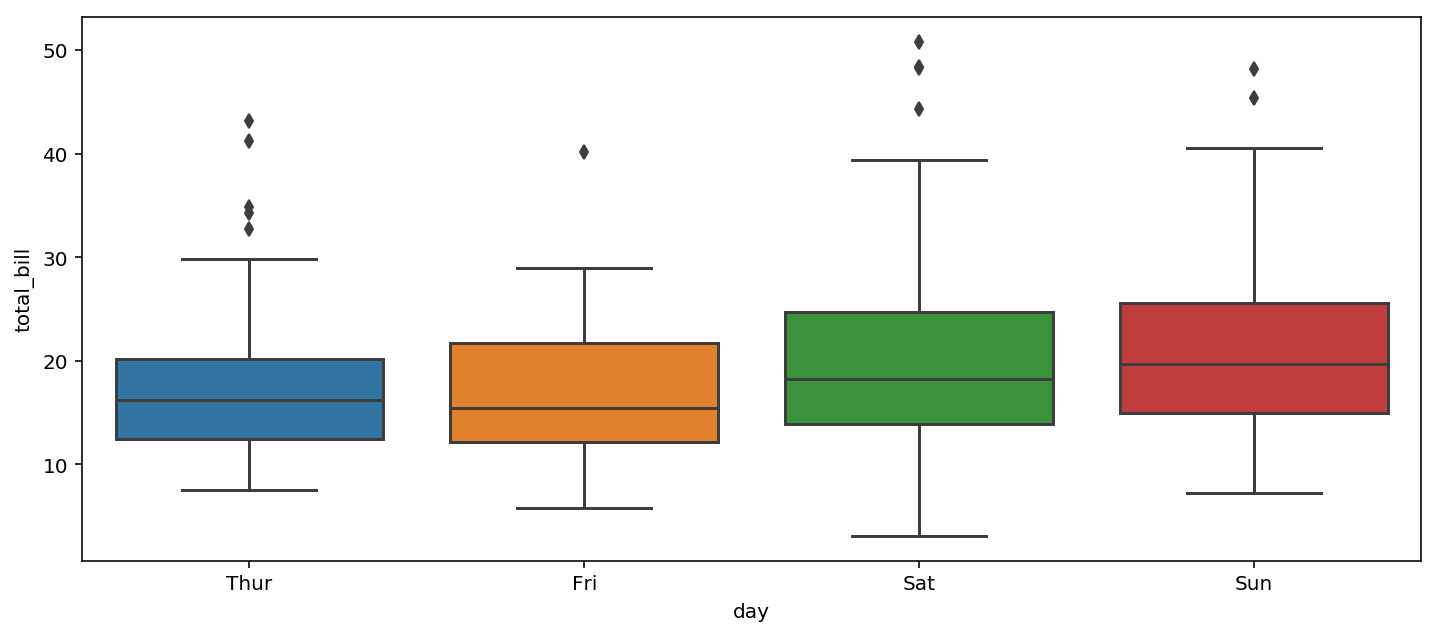

In [54]:
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['day'], df['total_bill'], orient = 'v');

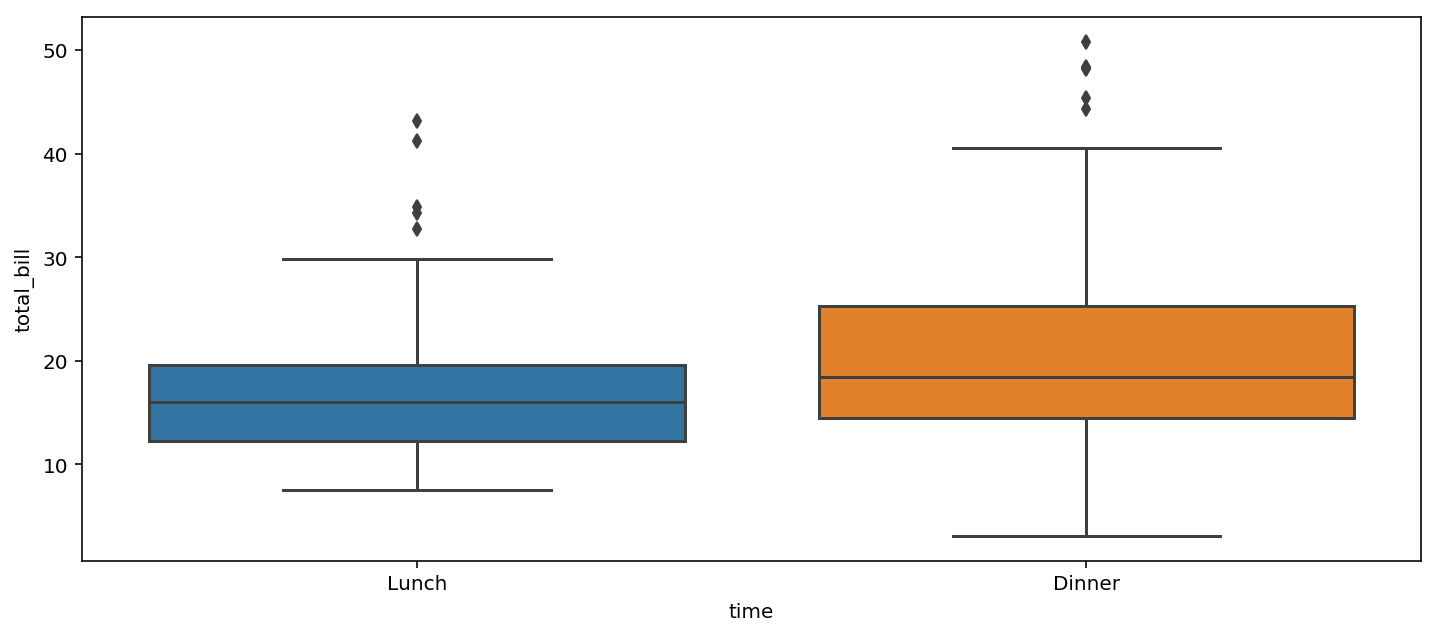

In [55]:
f, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['time'], df['total_bill'], orient = 'v');

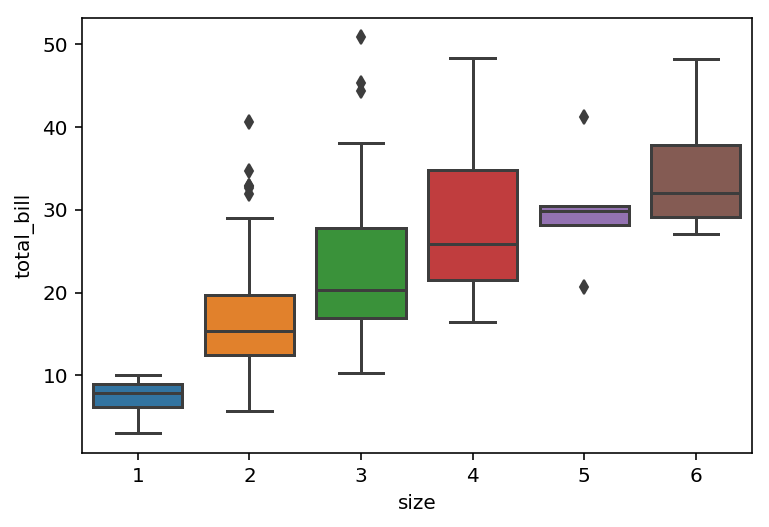

In [56]:
sns.boxplot(df['size'], df['total_bill'], orient = 'v');

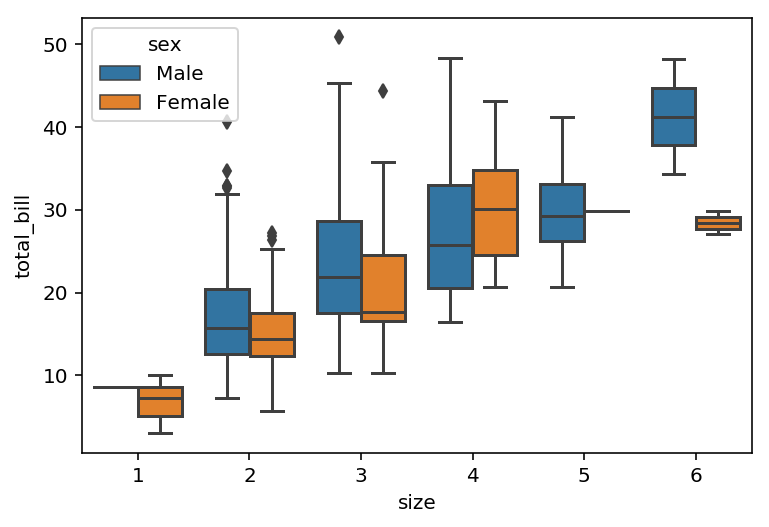

In [57]:
sns.boxplot(df['size'], df['total_bill'], hue=df['sex'], orient = 'v');

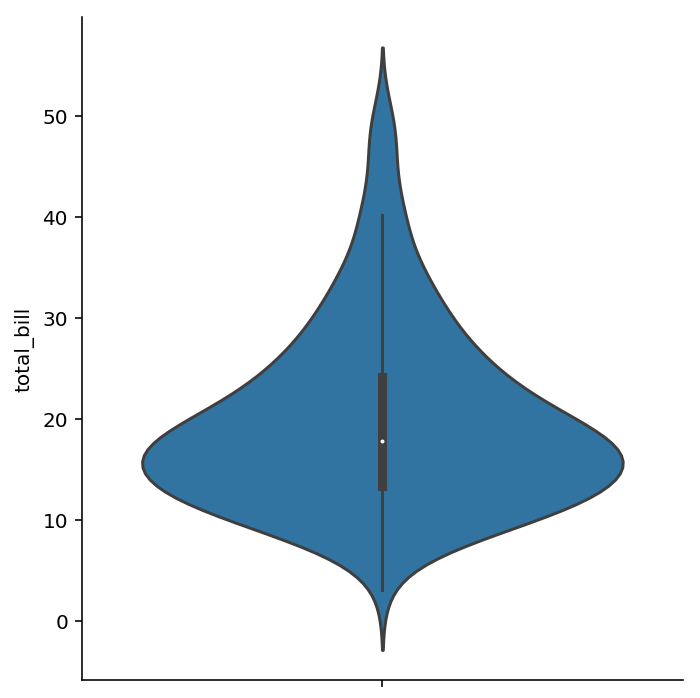

In [58]:
sns.catplot(y = 'total_bill', kind='violin', data= df);

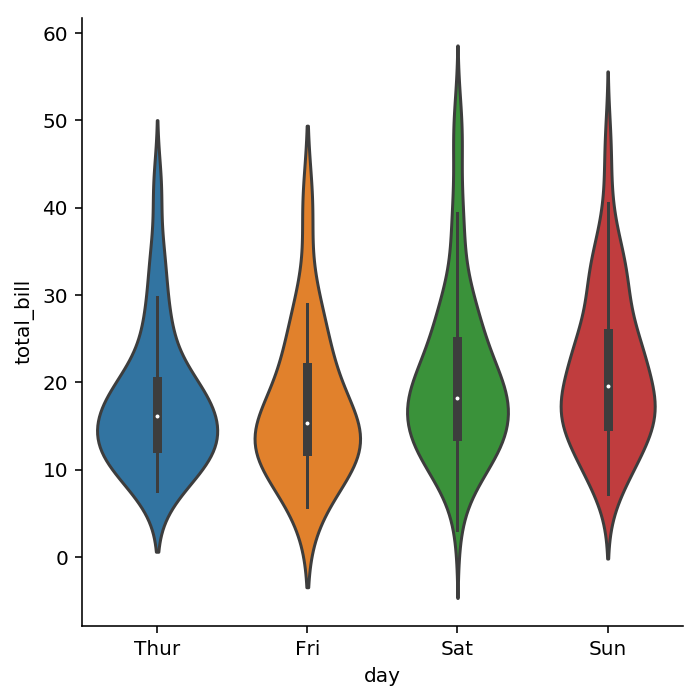

In [59]:
sns.catplot(x = 'day', y = 'total_bill', kind='violin', data= df);

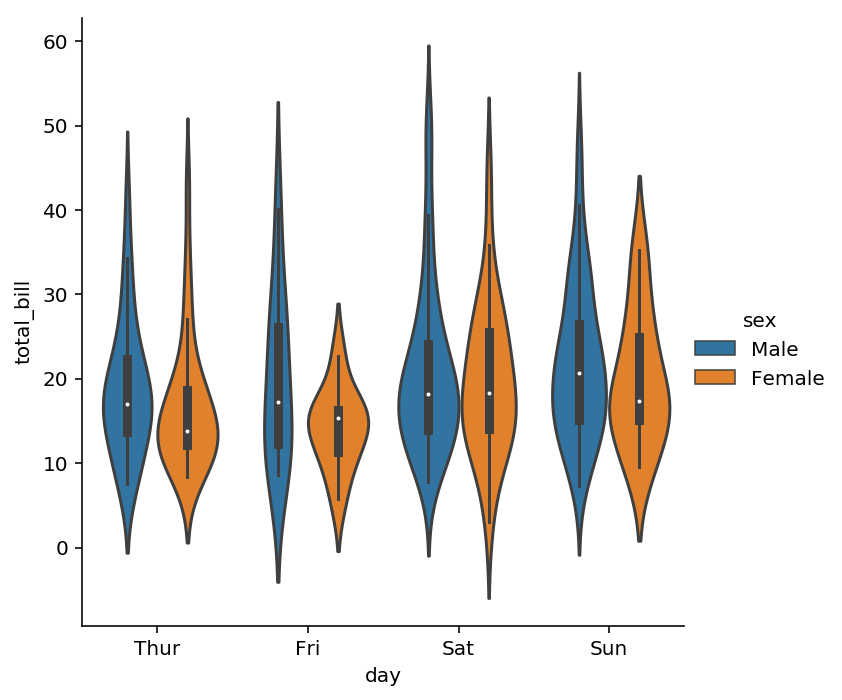

In [60]:
sns.catplot(x = 'day', y = 'total_bill', hue='sex', kind='violin', data= df);

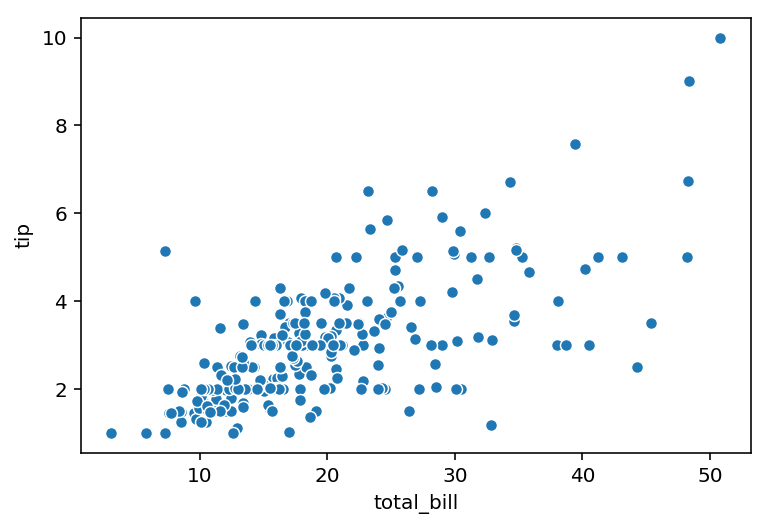

In [61]:
sns.scatterplot(x = 'total_bill', y='tip', data=df);

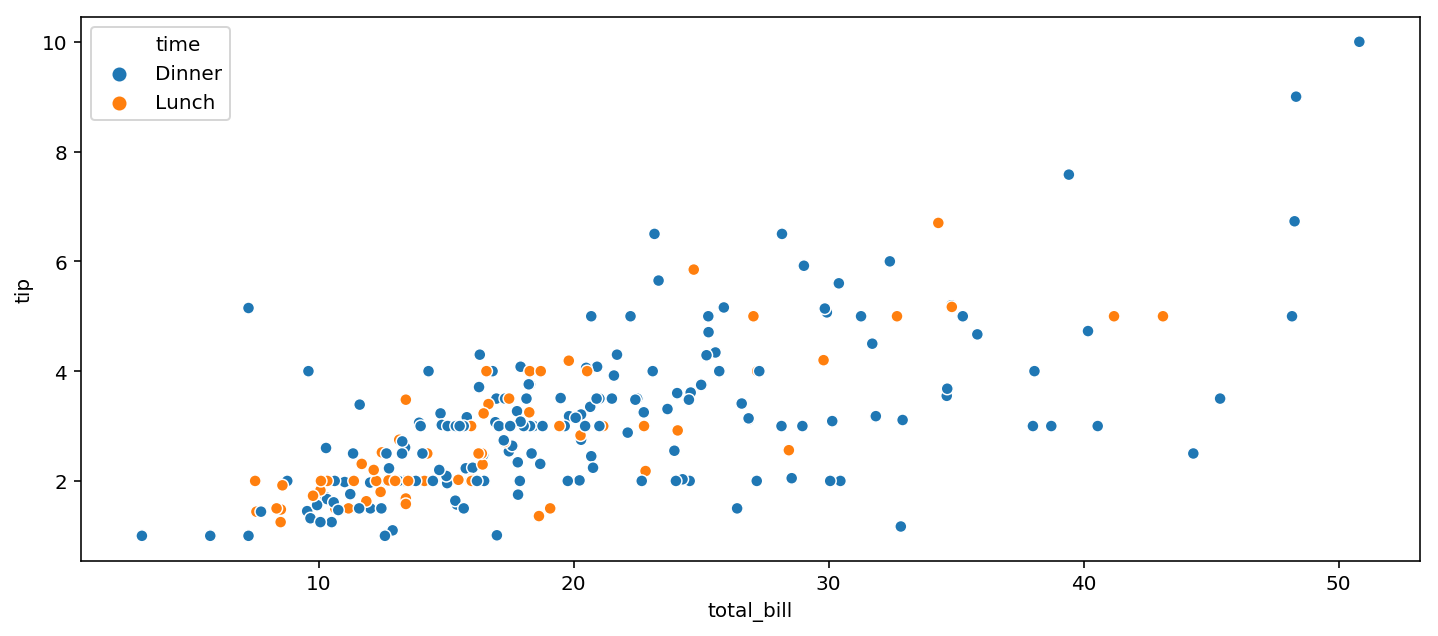

In [62]:
f, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(x = 'total_bill', y='tip', hue = 'time', data=df);

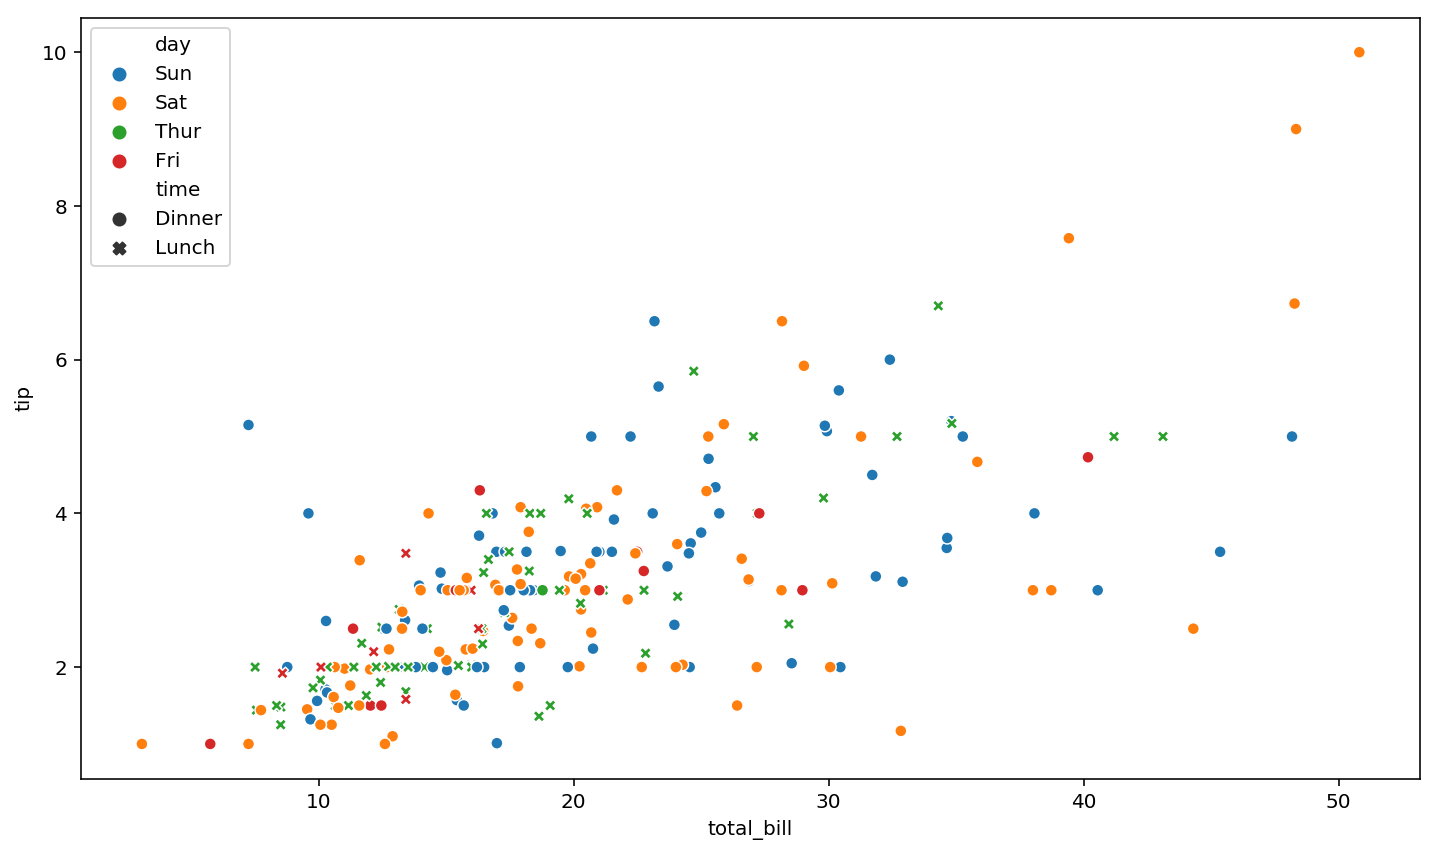

In [63]:
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x = 'total_bill', y='tip', hue = 'day', style = 'time', data=df);

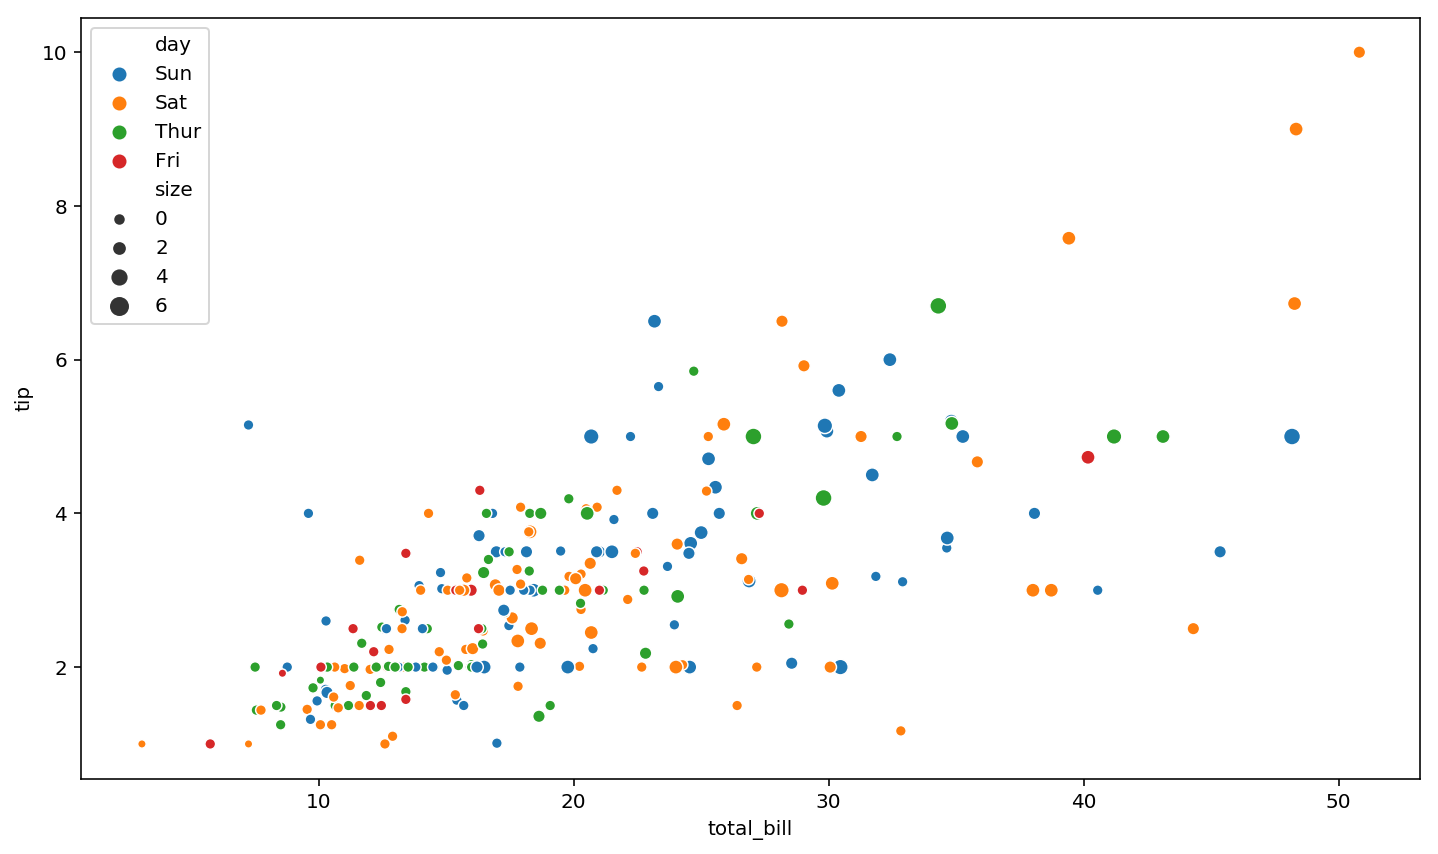

In [64]:
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x = 'total_bill', y='tip', hue = 'day', size='size', data=df);

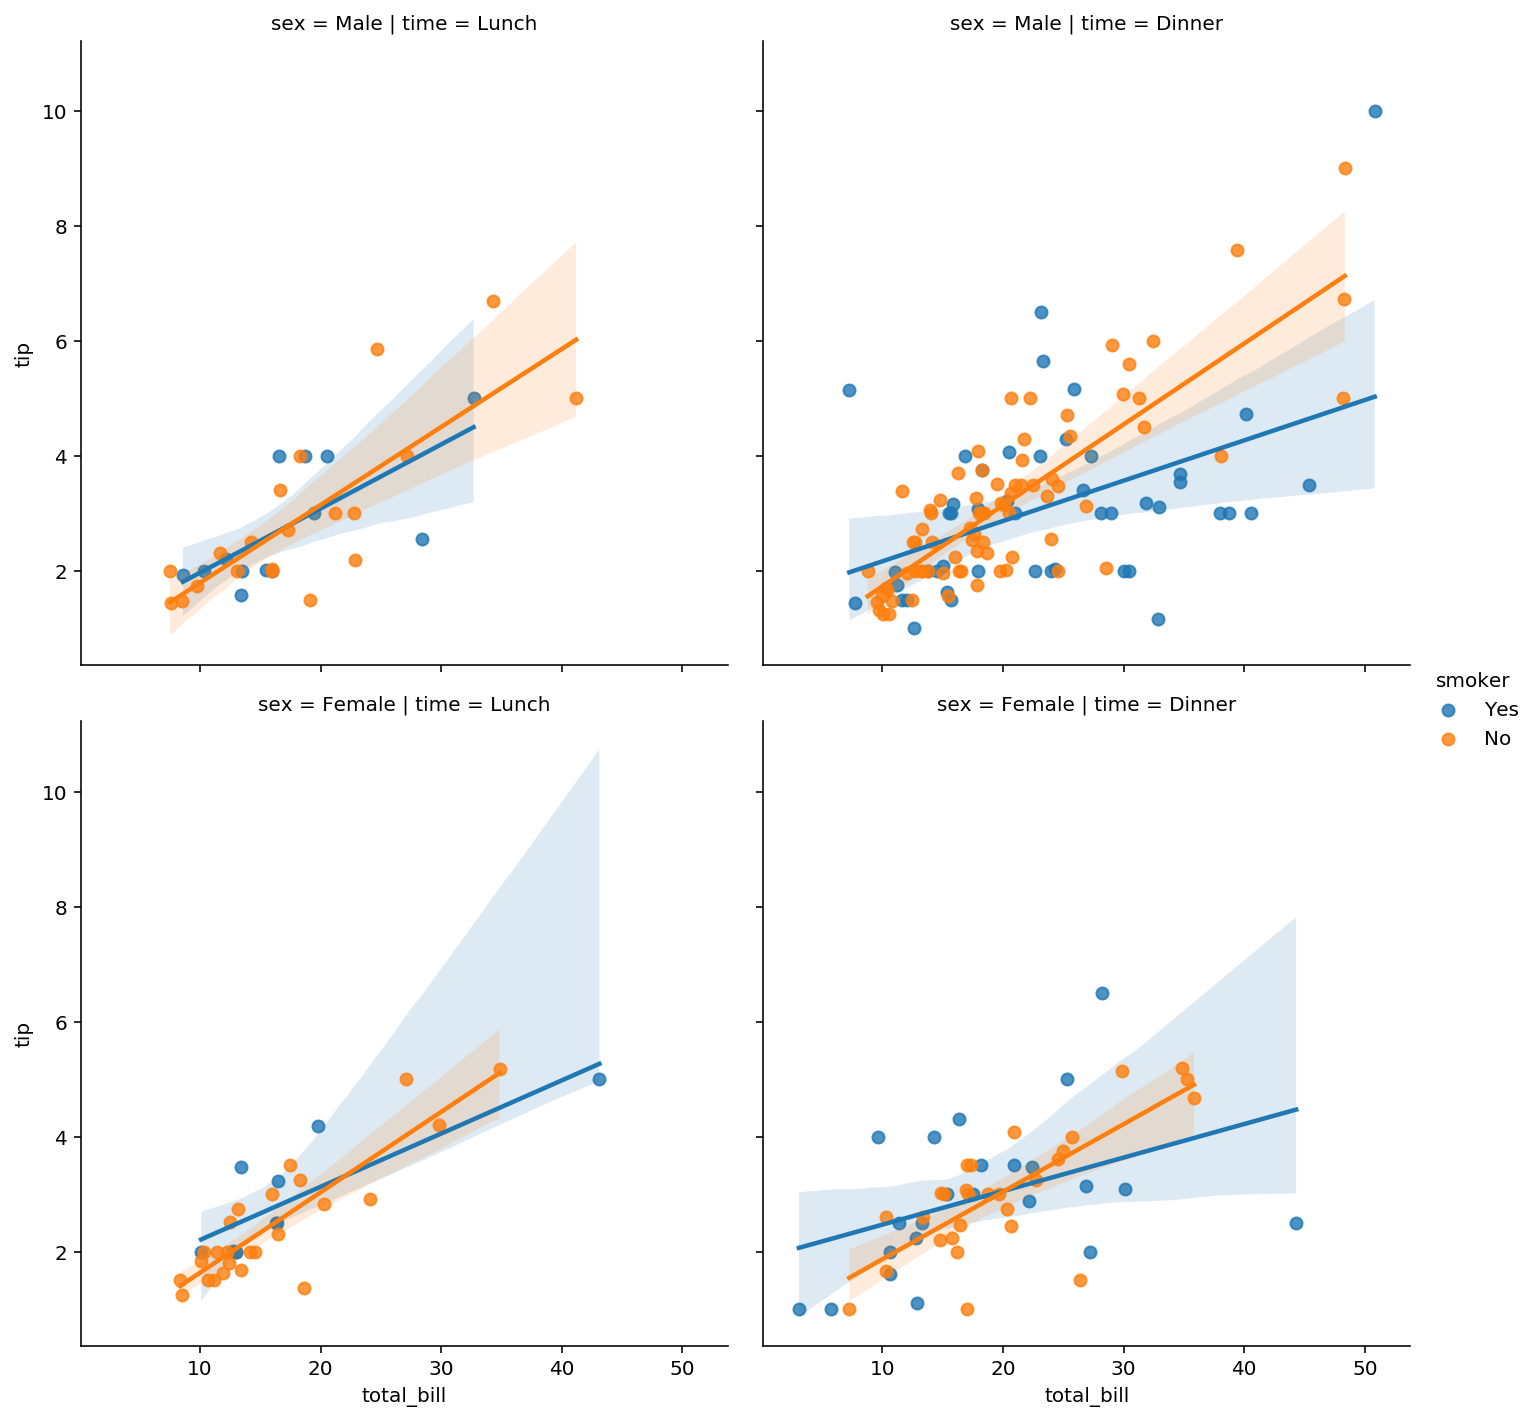

In [65]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col='time', row='sex', data = df);

In [66]:
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [68]:
df.shape

(150, 5)

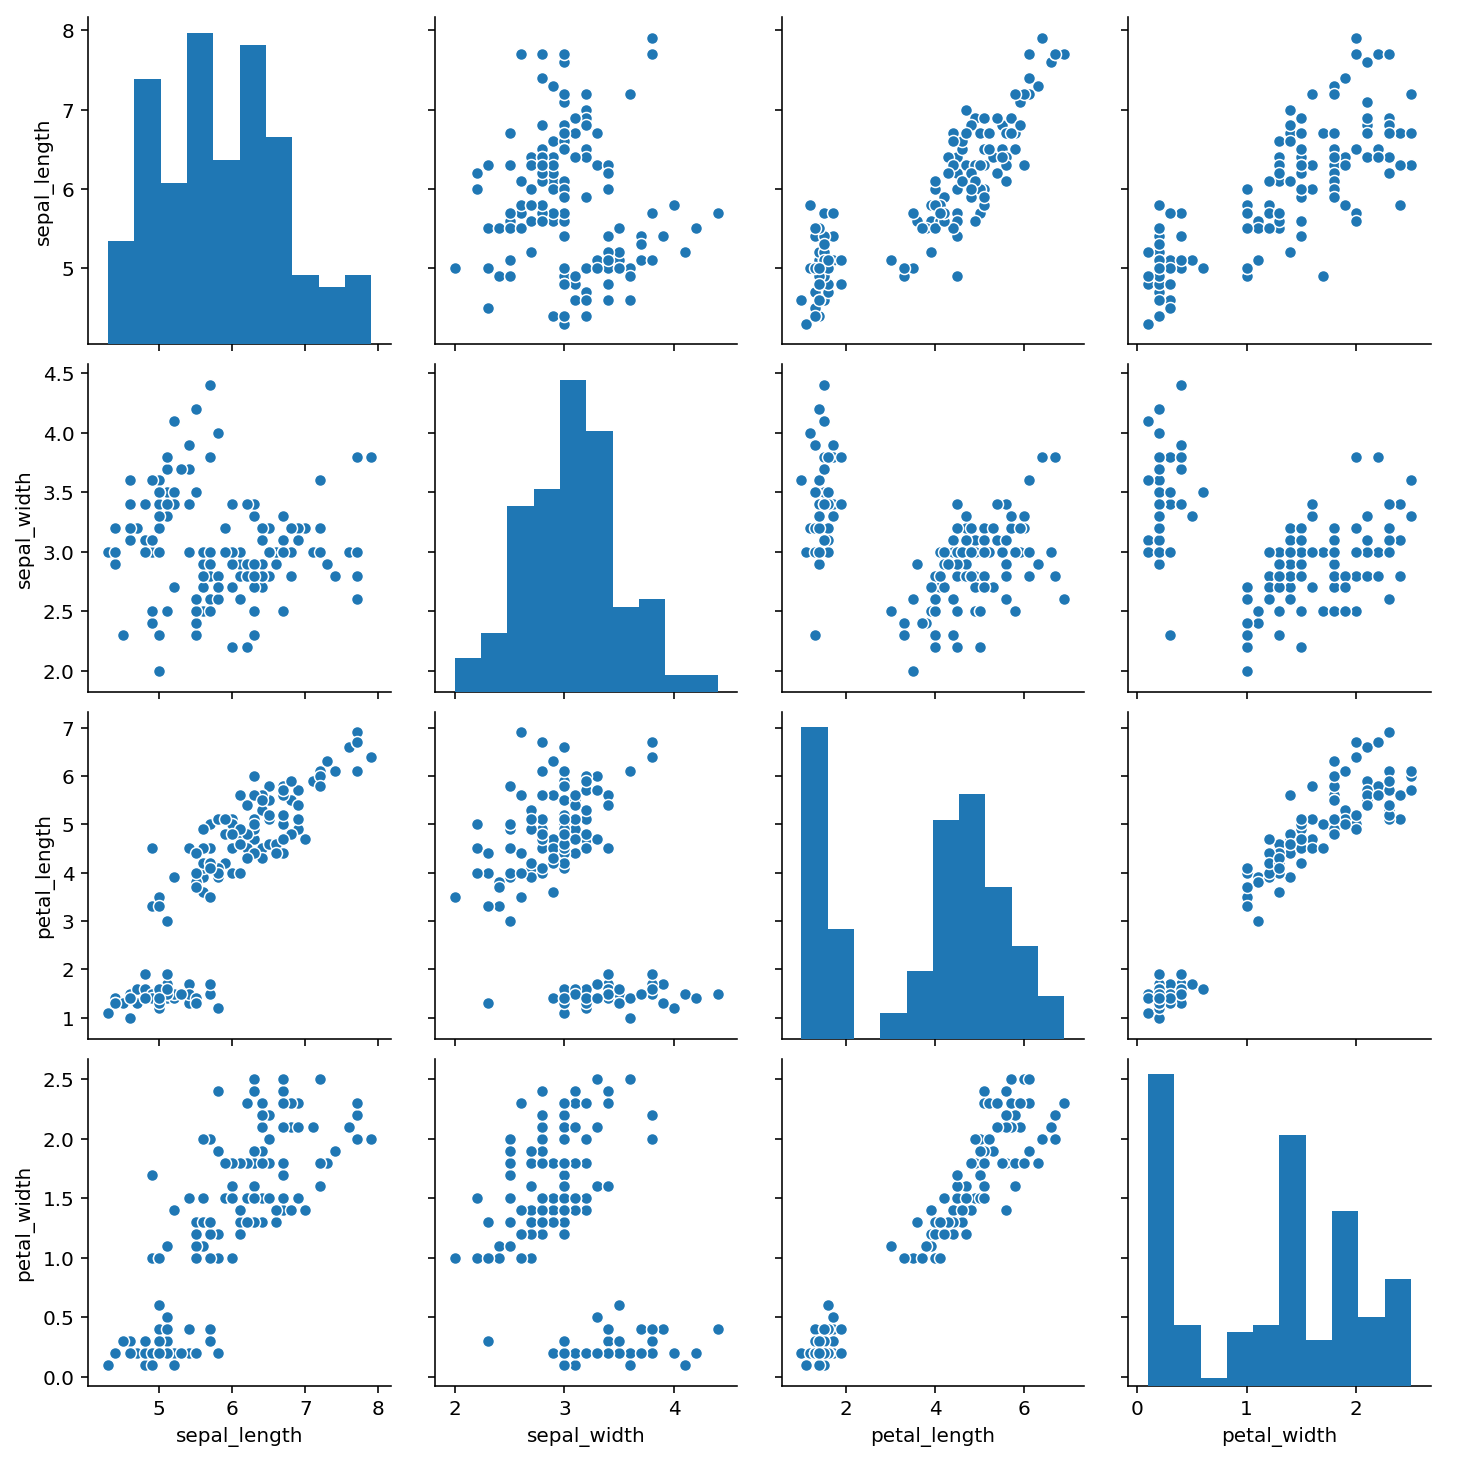

In [69]:
sns.pairplot(df);

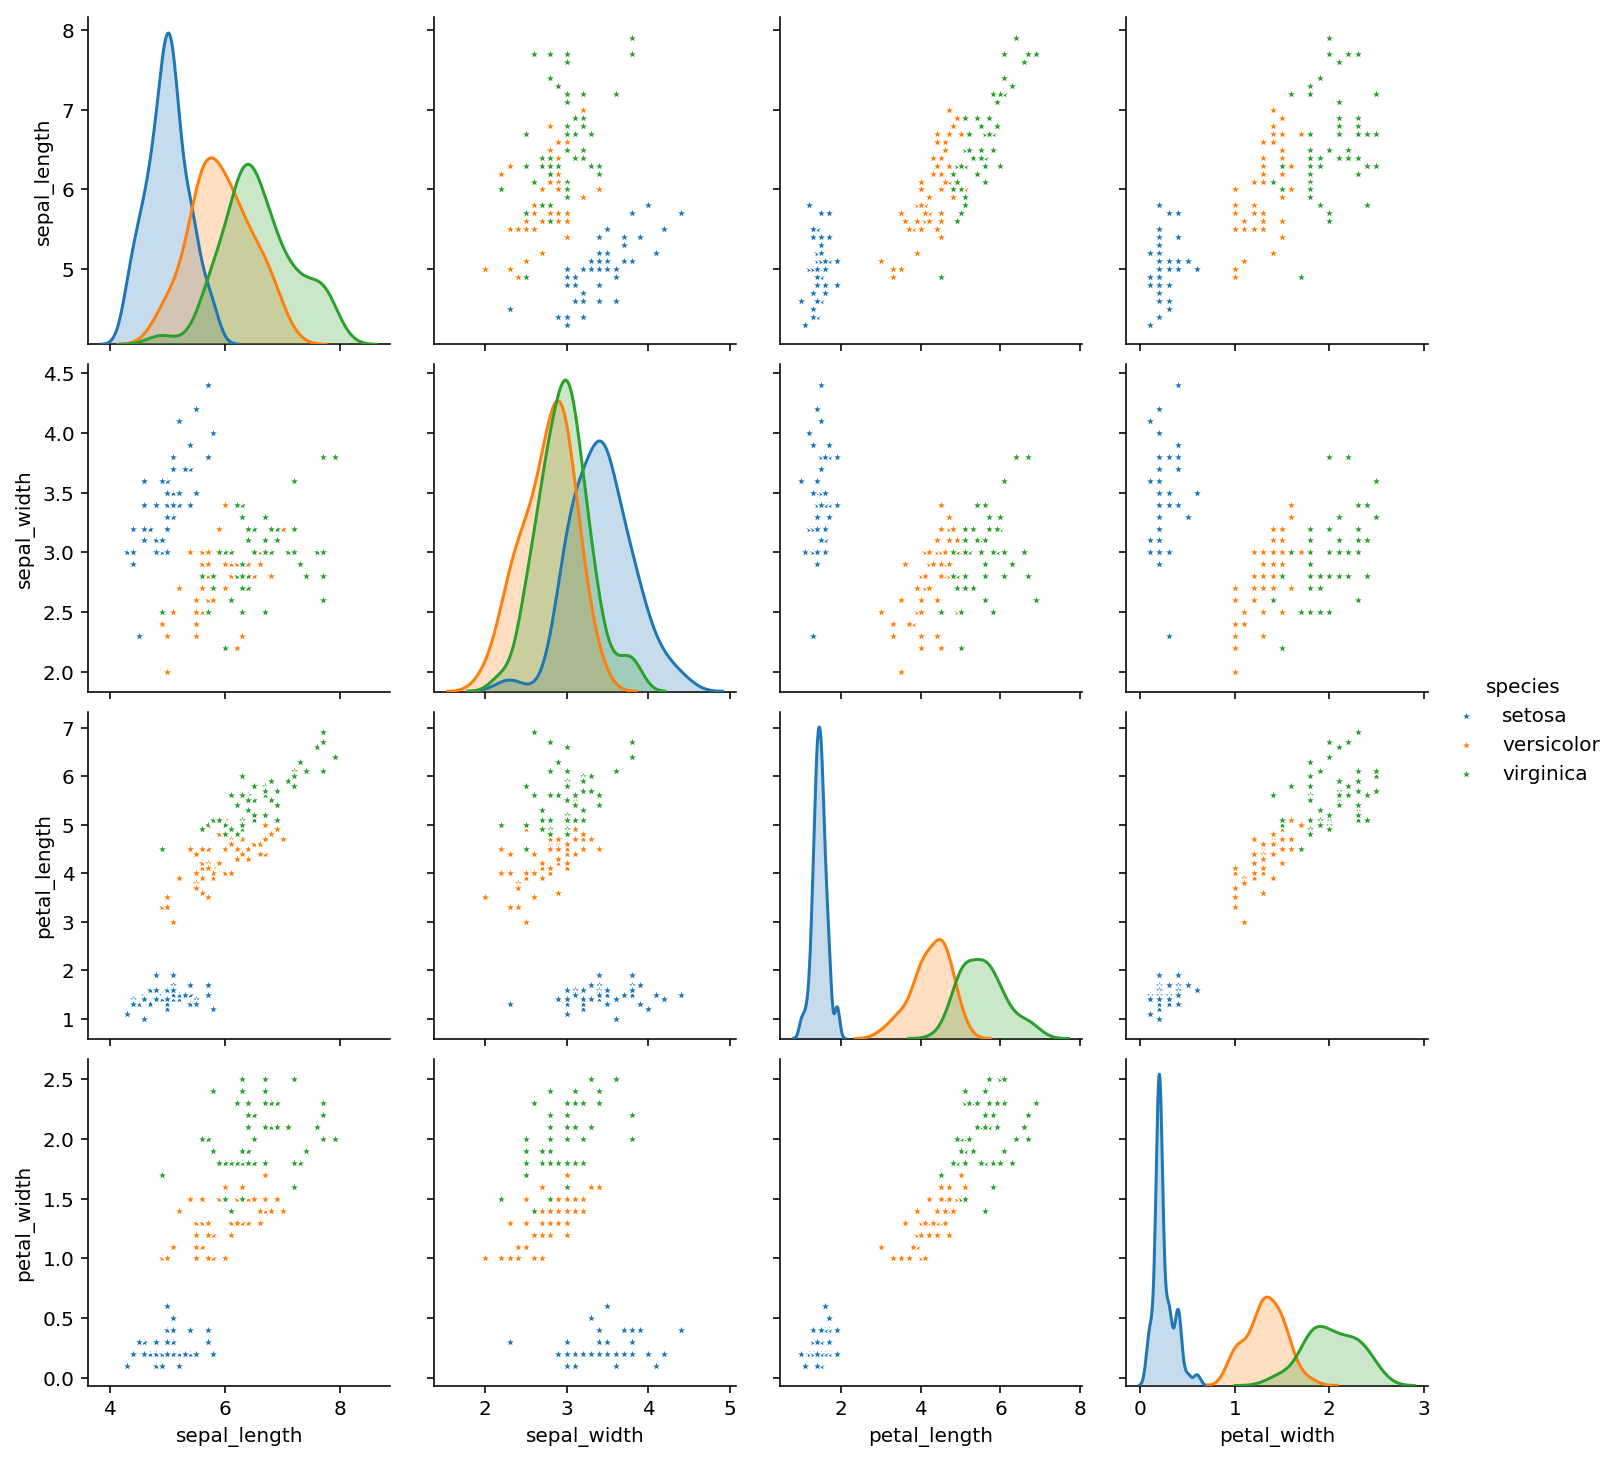

In [70]:
sns.pairplot(df, hue='species', markers = '*');

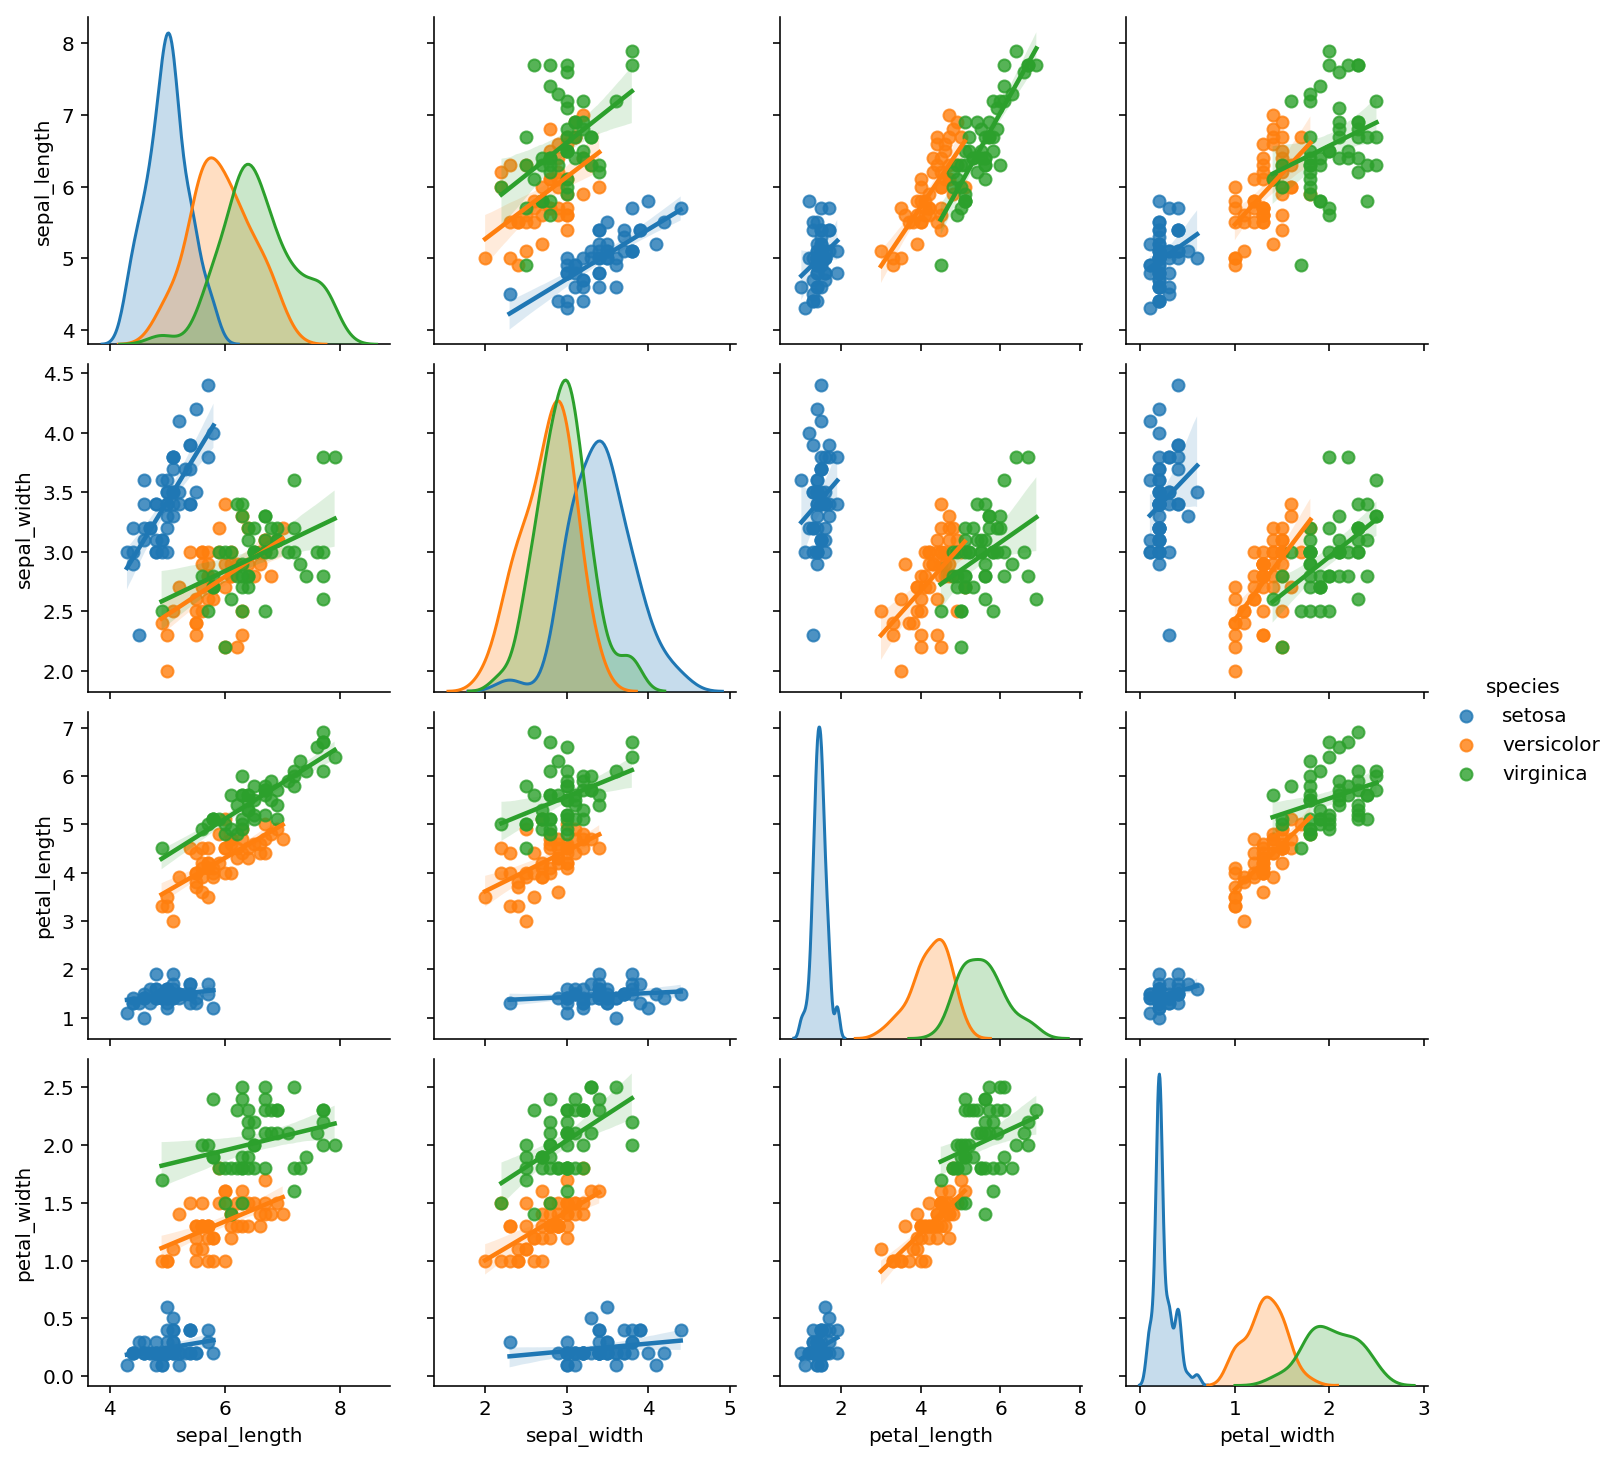

In [71]:
sns.pairplot(df, hue='species', kind='reg');

In [72]:
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [73]:
df.shape

(144, 3)

In [74]:
df['passengers'].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [75]:
df = df.pivot('month', 'year', 'passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


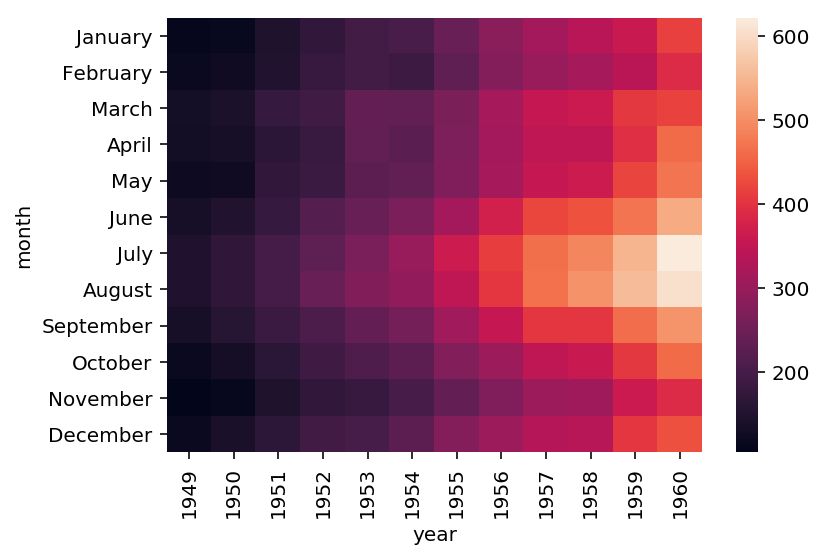

In [76]:
sns.heatmap(df);

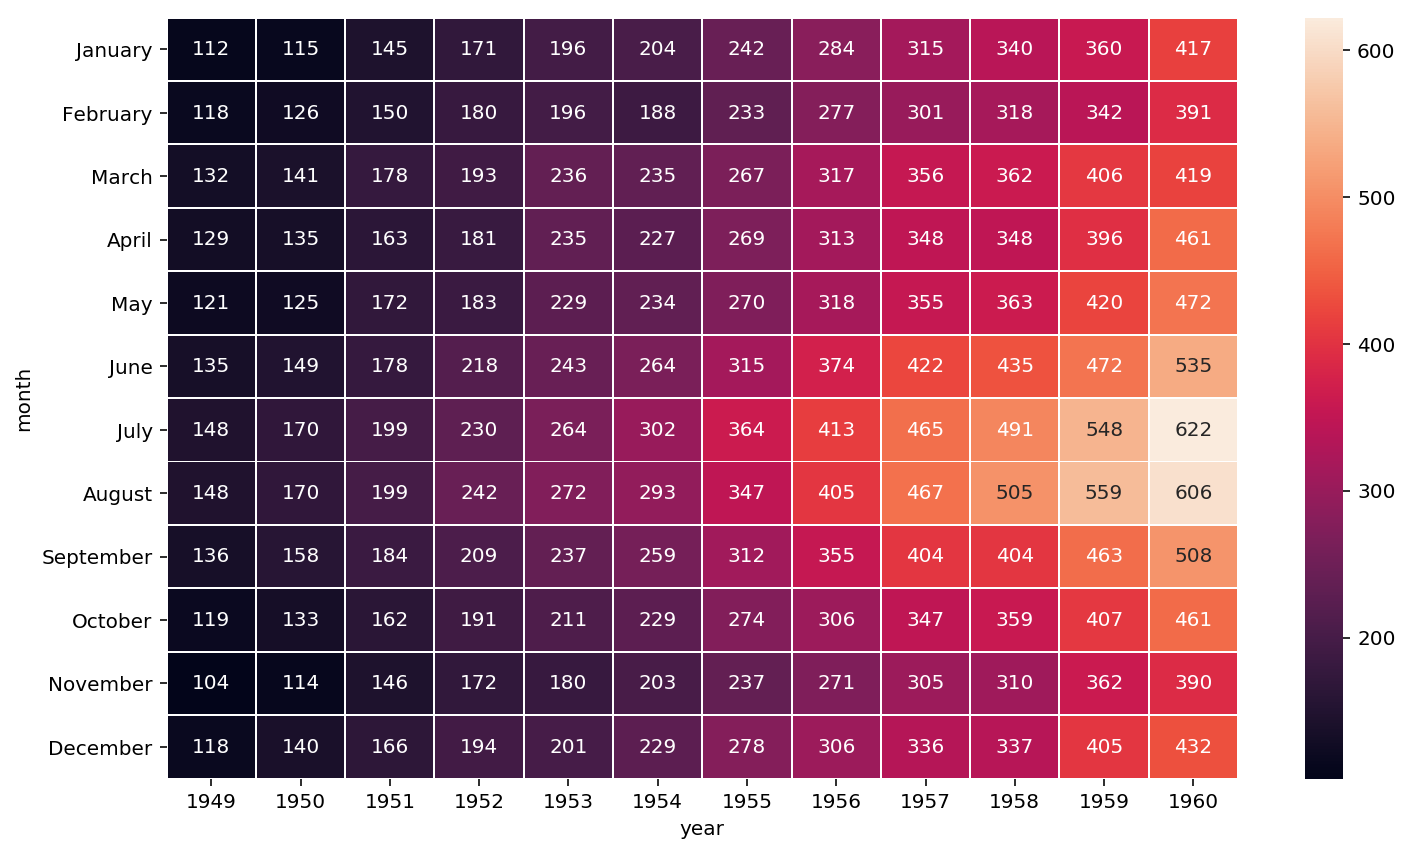

In [77]:
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df, annot = True, fmt = 'd', linewidths=.5);

In [79]:
fmri = sns.load_dataset('fmri')
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [80]:
df.shape

(1064, 5)

In [81]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [83]:
df['timepoint'].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [85]:
df['signal'].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [86]:
df.groupby('timepoint')['signal'].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [87]:
df.groupby('signal').count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [89]:
df.groupby('timepoint')['signal'].describe().T

timepoint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.016662,-0.025002,-0.012873,0.034446,0.098194,0.137725,0.127515,0.075660,0.013420,-0.032041,-0.053685,-0.058194,-0.052526,-0.043532,-0.033660,-0.025880,-0.022414,-0.021368,-0.021867
std,0.028326,0.030641,0.035440,0.058260,0.092838,0.123353,0.137332,0.129704,0.104216,0.072728,0.053148,0.053828,0.056991,0.053598,0.045983,0.039092,0.035035,0.034797,0.036322
min,-0.064454,-0.082174,-0.110565,-0.089708,-0.046347,-0.017946,-0.054405,-0.108222,-0.181241,-0.152929,-0.176453,-0.238474,-0.255486,-0.224351,-0.169312,-0.134828,-0.131641,-0.121574,-0.103513
25%,-0.039169,-0.046299,-0.034944,-0.001157,0.030912,0.042762,0.022409,-0.016252,-0.049453,-0.075693,-0.078893,-0.093127,-0.090391,-0.069285,-0.055110,-0.050536,-0.041122,-0.042946,-0.046781
50%,-0.018382,-0.024533,-0.013183,0.028430,0.070166,0.096535,0.068850,0.032486,-0.012834,-0.038496,-0.052906,-0.045699,-0.042294,-0.031612,-0.022165,-0.018207,-0.020777,-0.017070,-0.020225
75%,0.003539,-0.005388,0.009318,0.061840,0.144911,0.211638,0.218919,0.144781,0.030396,0.008717,-0.015302,-0.022522,-0.016239,-0.012958,-0.006797,0.000486,-0.001380,-0.000026,-0.002821
max,0.074399,0.063558,0.077277,0.185581,0.346775,0.476055,0.564985,0.494787,0.337143,0.221716,0.089231,0.030528,0.055766,0.059510,0.050133,0.047102,0.057105,0.073757,0.090520


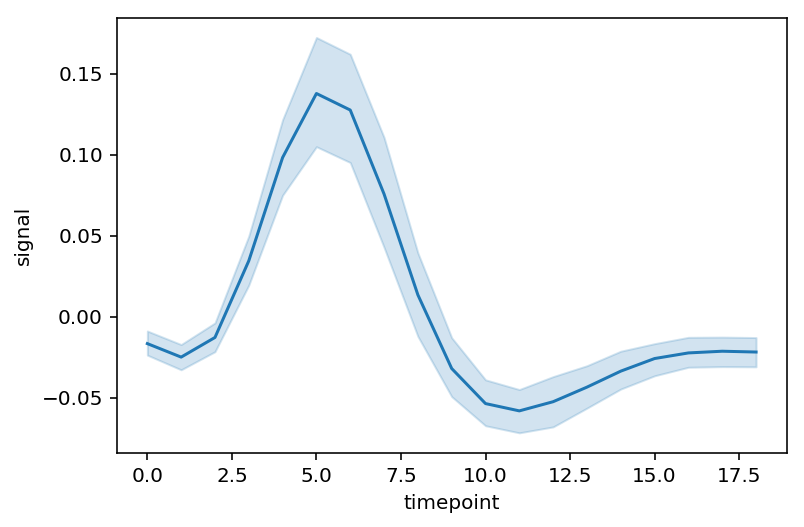

In [93]:
sns.lineplot(df['timepoint'], df['signal']);

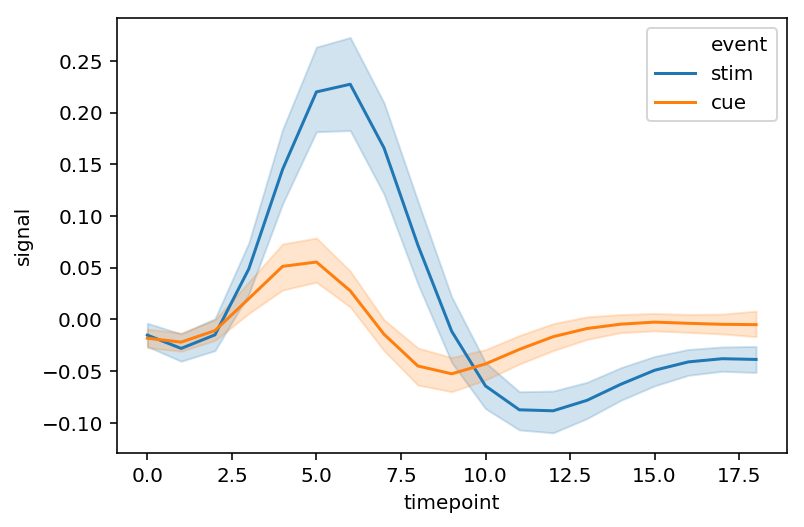

In [94]:
sns.lineplot(df['timepoint'], df['signal'], hue = df['event']);

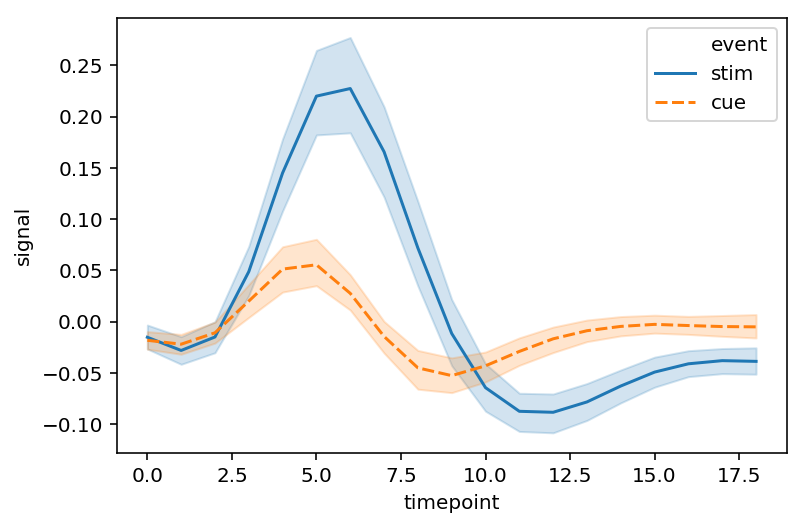

In [95]:
sns.lineplot(df['timepoint'], df['signal'], hue = df['event'], style =df['event'] );

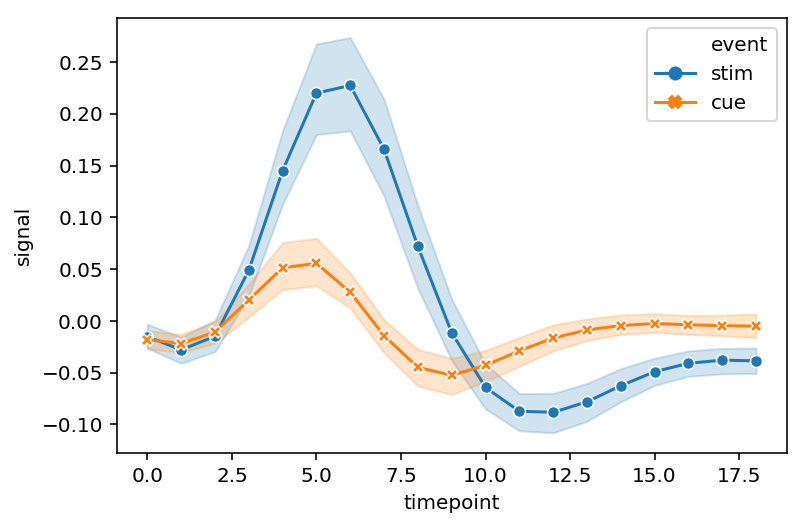

In [98]:
sns.lineplot(df['timepoint'],
             df['signal'],
             hue = df['event'],
             style =df['event'], 
             markers = True, 
             dashes = False);

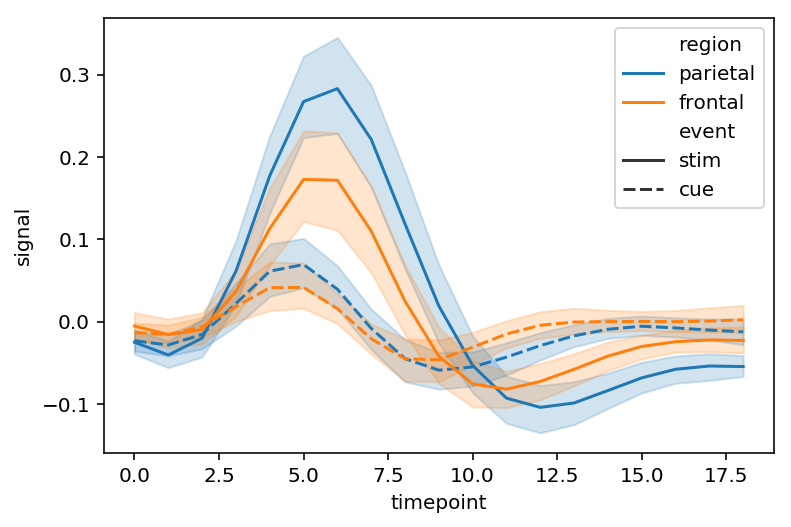

In [99]:
sns.lineplot(df['timepoint'],
             df['signal'],
             hue = df['region'],
             style =df['event']);